In [73]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
###Classification of toxic comments

###Maximum number of words
num_words = 10000
###Maximum comment length
max_comment_len = 50

In [75]:
###Read data from a file
train = pd.read_csv('train.csv')

In [76]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [77]:
###Select data for training
comments = train['comment_text']

In [78]:
comments[:5]

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [79]:
###Select the correct answers
y_train = train[['toxic', 'severe_toxic', 'obscene',	'threat',	'insult',	'identity_hate']]

In [80]:
y_train

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [81]:
###Text Tokenization
comments[:5]

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [82]:
###Create a Keras Tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=num_words)

In [83]:
###Train a tokenizer
tokenizer.fit_on_texts(comments)

In [84]:
###Look through the dictionary of the tokenizer
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'you': 6,
 'i': 7,
 'is': 8,
 'that': 9,
 'in': 10,
 'it': 11,
 'for': 12,
 'this': 13,
 'not': 14,
 'on': 15,
 'be': 16,
 'as': 17,
 'have': 18,
 'are': 19,
 'your': 20,
 'with': 21,
 'if': 22,
 'article': 23,
 'was': 24,
 'or': 25,
 'but': 26,
 'page': 27,
 'wikipedia': 28,
 'my': 29,
 'an': 30,
 'from': 31,
 'by': 32,
 'do': 33,
 'at': 34,
 'me': 35,
 'about': 36,
 'so': 37,
 'talk': 38,
 'what': 39,
 'can': 40,
 'there': 41,
 'all': 42,
 'has': 43,
 'will': 44,
 'please': 45,
 'no': 46,
 'would': 47,
 'one': 48,
 'like': 49,
 'just': 50,
 'they': 51,
 'he': 52,
 'which': 53,
 'any': 54,
 'been': 55,
 'should': 56,
 'more': 57,
 'we': 58,
 "don't": 59,
 'some': 60,
 'other': 61,
 'who': 62,
 'here': 63,
 'see': 64,
 'also': 65,
 'his': 66,
 'think': 67,
 'because': 68,
 'know': 69,
 'how': 70,
 'edit': 71,
 'am': 72,
 "i'm": 73,
 'people': 74,
 'why': 75,
 'up': 76,
 'only': 77,
 "it's": 78,
 'out': 79,
 'articles': 80,
 'use': 81,

In [85]:
###Convert comments to numeric representation
sequences = tokenizer.texts_to_sequences(comments)

In [86]:
###View comment in numerical representation
index = 1
print(comments[index])
print(sequences[index])

D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
[52, 2635, 13, 555, 3809, 73, 4556, 2706, 21, 94, 38, 803, 2679, 992, 589, 8377, 182]


In [87]:
tokenizer.word_index['he']

52

In [88]:
tokenizer.word_index['stuck']

2706

In [89]:
###Limit the length of comments
x_train = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_comment_len)

In [90]:
x_train[:5]

array([[   0,    0,    0,    0,    0,    0,  688,   75,    1,  126,  130,
         177,   29,  672, 4511, 1116,   86,  331,   51, 2278,   50, 6864,
          15,   60, 2756,  148,    7, 2937,   34,  117, 1221, 2825,    4,
          45,   59,  244,    1,  365,   31,    1,   38,   27,  143,   73,
        3462,   89, 3085, 4583, 2273,  985],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          52, 2635,   13,  555, 3809,   73, 4556, 2706,   21,   94,   38,
         803, 2679,  992,  589, 8377,  182],
       [   0,    0,    0,    0,    0,    0,    0,    0,  412,  437,   73,
         134,   14,  249,    2,   71,  314,   78,   50,    9,   13,  626,
           8, 2284,  492,  502,  102,    4,  611,    2,   35,  325,  126,
         363,    3,   29,   38,   27,   52,  208,    2,  434,   57,   36,
           1, 2394,   

In [91]:
###LSTM Network
model_lstm = tf.keras.models.Sequential()
model_lstm.add(tf.keras.layers.Embedding(num_words, 128, input_length=max_comment_len))
model_lstm.add(tf.keras.layers.SpatialDropout1D(0.5))
model_lstm.add(tf.keras.layers.LSTM(40, return_sequences=True))
model_lstm.add(tf.keras.layers.LSTM(40))
model_lstm.add(tf.keras.layers.Dense(6, activation='sigmoid'))

In [92]:
model_lstm.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy', 'AUC'])

In [93]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 128)           1280000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 40)            27040     
_________________________________________________________________
lstm_3 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 246       
Total params: 1,320,246
Trainable params: 1,320,246
Non-trainable params: 0
_________________________________________________________________


In [94]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = tf.keras.callbacks.ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [95]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=512,
                              validation_split=0.2,
                              callbacks=[checkpoint_callback_lstm])

Train on 127656 samples, validate on 31915 samples
Epoch 1/5
127488/127656 [============================>.] - ETA: 0s - loss: 0.1795 - accuracy: 0.9501 - AUC: 0.6986
Epoch 00001: val_accuracy improved from -inf to 0.96356, saving model to best_model_lstm.h5
127656/127656 [==============================] - 57s 447us/sample - loss: 0.1794 - accuracy: 0.9502 - AUC: 0.6987 - val_loss: 0.1398 - val_accuracy: 0.9636 - val_AUC: 0.7786
Epoch 2/5
127488/127656 [============================>.] - ETA: 0s - loss: 0.1053 - accuracy: 0.9688 - AUC: 0.9002
Epoch 00002: val_accuracy improved from 0.96356 to 0.97937, saving model to best_model_lstm.h5
127656/127656 [==============================] - 52s 409us/sample - loss: 0.1052 - accuracy: 0.9689 - AUC: 0.9004 - val_loss: 0.0633 - val_accuracy: 0.9794 - val_AUC: 0.9693
Epoch 3/5
127488/127656 [============================>.] - ETA: 0s - loss: 0.0568 - accuracy: 0.9807 - AUC: 0.9738 ETA: 2s - loss: 0.0568 - accura
Epoch 00003: val_accuracy improved fr

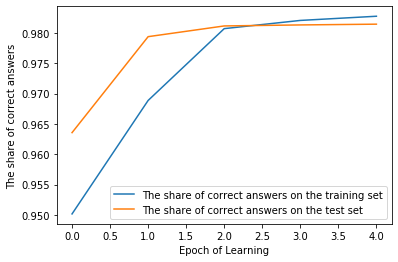

In [96]:
plt.plot(history_lstm.history['accuracy'], 
         label='The share of correct answers on the training set')
plt.plot(history_lstm.history['val_accuracy'], 
         label='The share of correct answers on the test set')
plt.xlabel('Epoch of Learning')
plt.ylabel('The share of correct answers')
plt.legend()
plt.show()

In [97]:
###Loading test data set
test_comments = pd.read_csv('test.csv')

In [98]:
test_comments[:10]

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [99]:
test_labels = pd.read_csv('test_labels.csv')

In [100]:
test_labels[:10]

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
5,0001ea8717f6de06,0,0,0,0,0,0
6,00024115d4cbde0f,-1,-1,-1,-1,-1,-1
7,000247e83dcc1211,0,0,0,0,0,0
8,00025358d4737918,-1,-1,-1,-1,-1,-1
9,00026d1092fe71cc,-1,-1,-1,-1,-1,-1


In [101]:
test_full = pd.merge(test_comments, test_labels, on='id')

In [102]:
test_full

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",-1,-1,-1,-1,-1,-1


In [103]:
test = test_full[test_full['toxic']!=-1]

In [104]:
test

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
7,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
153150,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
153151,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
153154,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
153155,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [105]:
###Convert comments to numeric representation
test_sequences = tokenizer.texts_to_sequences(test['comment_text'])

In [106]:
x_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_comment_len)

In [107]:
x_test[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  127,    6,   12, 1085,    7,   67,  101, 1092,    3,    6,
           4,   47,   14,  360,  175,  137],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        1050,  559,   13,  293,    8, 3327],
       [  74,   18, 1315,  294, 1055,    2,    1, 5799, 1081,    4,   75,
          33,    6, 1498, 2804,   76,    1,  250, 1071,  562,  280, 6796,
        5670,  258,  173,   50,  272,   76, 1435,   15,    1, 4063,   12,
        2326,    1,   77, 4101,   10,    1,  694,   23,    9,   52,    8,
         846,  800,   

In [108]:
###Correct answers
y_test = test[['toxic',	'severe_toxic',	'obscene', 'threat',	'insult',	'identity_hate']]

In [109]:
y_test[:10]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0,0,0,0,0,0
7,0,0,0,0,0,0
11,0,0,0,0,0,0
13,0,0,0,0,0,0
14,0,0,0,0,0,0
16,0,0,0,0,0,0
17,0,0,0,0,0,0
19,0,0,0,0,0,0
21,1,0,0,0,0,0
22,0,0,0,0,0,0


In [110]:
###Evaluate the quality of the network on a test data set
model_lstm.load_weights(model_lstm_save_path)

In [111]:
model_lstm.evaluate(x_test, y_test, verbose=1)

63978/63978 [==============================] - 18s 288us/sample - loss: 0.0739 - accuracy: 0.9714 - AUC: 0.9663


[0.07390635027971874, 0.97136533, 0.96634126]

In [163]:
###Try to classify comments
comment = "You motherfucker, come on you little ass… fuck with me, eh? You fucking little asshole, dickhead cocksucker…You fuckin' come on, come fuck with me! I'll get your ass, you jerk! Oh, you fuckhead motherfucker! Fuck all you and your family! Come on, you cocksucker, slime bucket, shitface turdball! Come on, you scum sucker, you fucking with me? Come on, you asshole!!!"

In [164]:
sequence = tokenizer.texts_to_sequences([comment])

In [165]:
sequence

[[6,
  4558,
  274,
  15,
  6,
  245,
  129,
  21,
  35,
  3129,
  6,
  394,
  245,
  1044,
  1423,
  6583,
  274,
  15,
  274,
  129,
  21,
  35,
  236,
  96,
  20,
  417,
  6,
  3038,
  378,
  6,
  4558,
  129,
  42,
  6,
  4,
  20,
  723,
  274,
  15,
  6,
  1873,
  274,
  15,
  6,
  3848,
  8728,
  6,
  394,
  21,
  35,
  274,
  15,
  6,
  1044]]

In [166]:
data = tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=max_comment_len)

In [167]:
data

array([[   6,  245,  129,   21,   35, 3129,    6,  394,  245, 1044, 1423,
        6583,  274,   15,  274,  129,   21,   35,  236,   96,   20,  417,
           6, 3038,  378,    6, 4558,  129,   42,    6,    4,   20,  723,
         274,   15,    6, 1873,  274,   15,    6, 3848, 8728,    6,  394,
          21,   35,  274,   15,    6, 1044]])

In [168]:
result = model_lstm.predict(data)

In [169]:
result

array([[0.9901702 , 0.5320796 , 0.955809  , 0.08436647, 0.8970361 ,
        0.26325974]], dtype=float32)